In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import statsmodels. api as sm
import statsmodels.formula.api as smf
import sys, os
import ast
import re
import seaborn as sns
import inspect
from collections import Counter

In [2]:
sns.__version__

'0.10.0'

# Basic features

In [3]:
CURRENTDIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))))
results = pd.read_excel(os.path.join(CURRENTDIR,"data/extracted_data_3.xlsx"))

In [4]:
results.columns

Index(['file', 'locutor', 'block', 'conv', 'it', 'conv_id_unif', 'tier',
       'content_complexity', 'count_syllables', 'extract_sentiment',
       'extract_subjectivity', 'lexical_richness', 'linguistic_complexity',
       'mean_ipu_lgth', 'nb_ipu', 'nb_tokens', 'nratio_discourse',
       'nratio_feedback', 'nratio_filled_pause', 'qt_discourse', 'qt_feedback',
       'qt_filled_pause', 'ratio_discourse', 'ratio_feedback',
       'ratio_filled_pause', 'ratio_silence_lgth', 'speech_rate',
       'speech_rate_2', 'speech_rate_max', 'speech_rate_mean',
       'speech_rate_min', 'speech_rate_min4', 'sum_ipu_lgth', 'extract_text'],
      dtype='object')

In [5]:
d = results[['lexical_richness', 'linguistic_complexity', 'content_complexity', 
       'count_syllables', 'nb_ipu', 'nb_tokens', 'mean_ipu_lgth', 'sum_ipu_lgth', 'ratio_silence_lgth', 
       'nratio_discourse', 'nratio_feedback', 'nratio_filled_pause', 'qt_discourse', 'qt_feedback',
       'qt_filled_pause', 'ratio_discourse', 'ratio_feedback',
       'ratio_filled_pause', 'speech_rate', 'speech_rate_mean', 'speech_rate_min4']]

In [58]:
def plot_corrmat(d, figsize=(20,20)):
    # Compute the correlation matrix
    corr = d.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, ax=ax,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

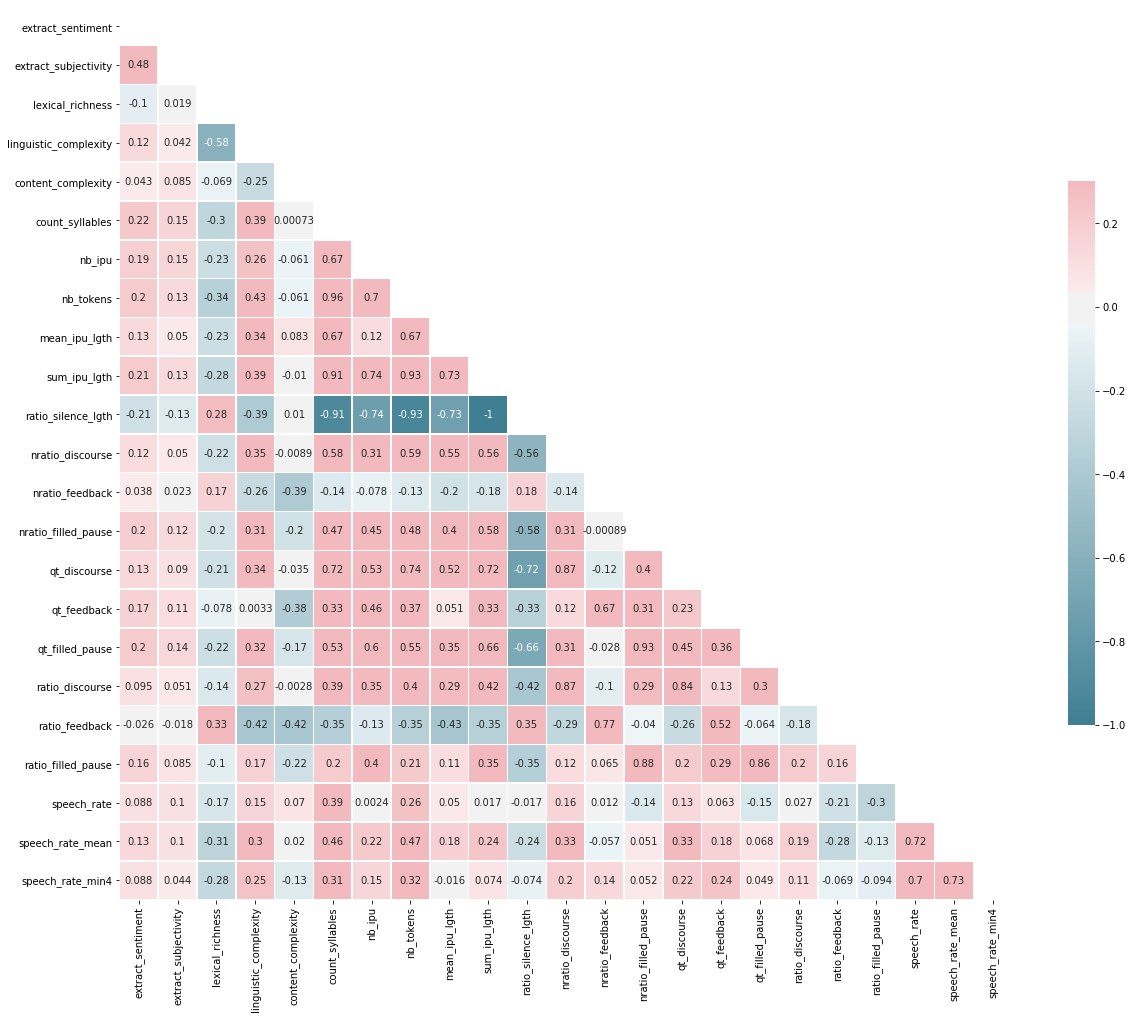

In [8]:
plot_corrmat(d)

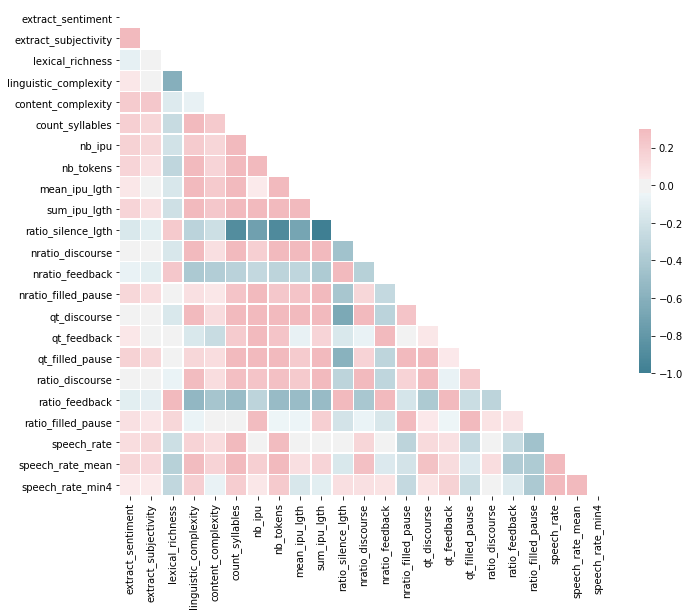

In [13]:
plot_corrmat(d[results.tier == 'participant'])

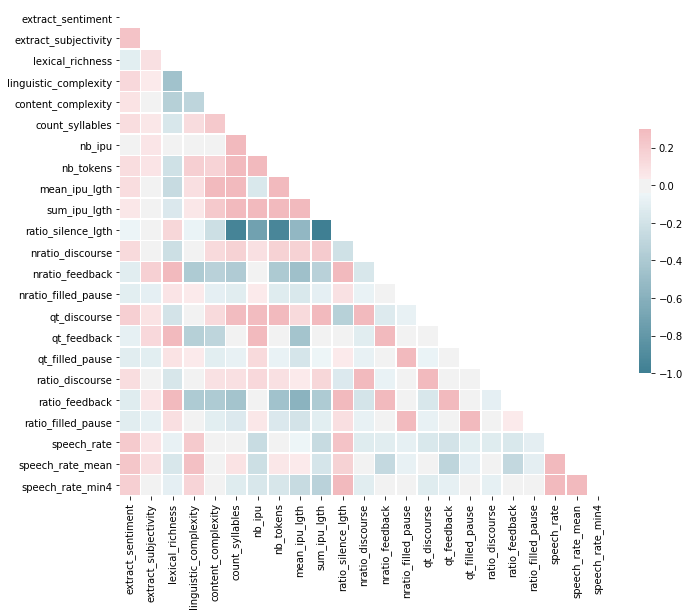

In [14]:
plot_corrmat(d[(results.tier == 'conversant') & (results.conv == 2)])

**Participant - conversant correlation**

With human agent

In [44]:
int_cols = ['lexical_richness', 'linguistic_complexity', 'content_complexity', 
       'count_syllables', 'nb_ipu', 'nb_tokens', 'mean_ipu_lgth', 'sum_ipu_lgth', 'ratio_silence_lgth', 
       'nratio_discourse', 'nratio_feedback', 'nratio_filled_pause', 'qt_discourse', 'qt_feedback',
       'qt_filled_pause', 'ratio_discourse', 'ratio_feedback',
       'ratio_filled_pause', 'speech_rate', 'speech_rate_mean', 'speech_rate_min4']
main_cols = ['locutor', 'block', 'conv', 'it', 'conv_id_unif']

participant = results[(results.tier == 'participant') & (results.conv == 1)][main_cols+int_cols].reset_index(drop=True)
conversant = results[(results.tier == 'conversant') & (results.conv == 1)][main_cols+int_cols].reset_index(drop=True)
# create merge data
merres = pd.merge(participant, conversant, on=main_cols, suffixes=('_part', '_conv'), validate="one_to_one")

In [45]:
d = merres[[x+'_part' for x in int_cols]+[x+'_conv' for x in int_cols]].corr()
p = {}
for col in int_cols:
    p[col] = d[col+'_part'][col+'_conv']
pH = pd.Series(p, name = 'conv_part_corr_H')
pH

lexical_richness         0.132887
linguistic_complexity    0.119378
content_complexity      -0.000112
count_syllables         -0.243169
nb_ipu                  -0.135033
nb_tokens               -0.263813
mean_ipu_lgth           -0.076801
sum_ipu_lgth            -0.474570
ratio_silence_lgth      -0.474570
nratio_discourse        -0.030476
nratio_feedback         -0.265556
nratio_filled_pause     -0.105970
qt_discourse            -0.082694
qt_feedback              0.095148
qt_filled_pause         -0.282669
ratio_discourse         -0.018500
ratio_feedback          -0.266819
ratio_filled_pause      -0.005191
speech_rate              0.038033
speech_rate_mean         0.057126
speech_rate_min4         0.027056
Name: conv_part_corr_H, dtype: float64

With robotic agent

In [41]:
participant = results[(results.tier == 'participant') & (results.conv == 2)][main_cols+int_cols].reset_index(drop=True)
conversant = results[(results.tier == 'conversant') & (results.conv == 2)][main_cols+int_cols].reset_index(drop=True)
# create merge data
merres = pd.merge(participant, conversant, on=main_cols, suffixes=('_part', '_conv'), validate="one_to_one")
d = merres[[x+'_part' for x in int_cols]+[x+'_conv' for x in int_cols]].corr()
p = {}
for col in int_cols:
    p[col] = d[col+'_part'][col+'_conv']
pR = pd.Series(p, name = 'conv_part_corr_R')
pR

lexical_richness        -0.044228
linguistic_complexity   -0.044085
content_complexity       0.031639
count_syllables         -0.268057
nb_ipu                   0.027845
nb_tokens               -0.281691
mean_ipu_lgth           -0.128240
sum_ipu_lgth            -0.329163
ratio_silence_lgth      -0.329163
nratio_discourse        -0.066894
nratio_feedback         -0.266474
nratio_filled_pause      0.050936
qt_discourse            -0.071344
qt_feedback              0.085590
qt_filled_pause          0.000806
ratio_discourse          0.010036
ratio_feedback          -0.283343
ratio_filled_pause       0.026283
speech_rate             -0.274064
speech_rate_mean        -0.320092
speech_rate_min4        -0.226682
Name: conv_part_corr_R, dtype: float64

global

In [42]:
participant = results[(results.tier == 'participant')][main_cols+int_cols].reset_index(drop=True)
conversant = results[(results.tier == 'conversant')][main_cols+int_cols].reset_index(drop=True)
# create merge data
merres = pd.merge(participant, conversant, on=main_cols, suffixes=('_part', '_conv'), validate="one_to_one")
d = merres[[x+'_part' for x in int_cols]+[x+'_conv' for x in int_cols]].corr()
p = {}
for col in int_cols:
    p[col] = d[col+'_part'][col+'_conv']
pA = pd.Series(p, name = 'conv_part_corr_A')
pA

lexical_richness         0.069433
linguistic_complexity    0.006798
content_complexity       0.044883
count_syllables         -0.044499
nb_ipu                  -0.076367
nb_tokens               -0.036958
mean_ipu_lgth            0.040189
sum_ipu_lgth            -0.181944
ratio_silence_lgth      -0.181944
nratio_discourse        -0.005282
nratio_feedback         -0.121063
nratio_filled_pause     -0.023691
qt_discourse            -0.038987
qt_feedback              0.304250
qt_filled_pause         -0.143359
ratio_discourse         -0.032774
ratio_feedback          -0.256013
ratio_filled_pause      -0.075543
speech_rate             -0.048624
speech_rate_mean        -0.039308
speech_rate_min4        -0.005526
Name: conv_part_corr_A, dtype: float64

In [46]:
pd.concat([pH, pR, pA], axis=1)

,conv_part_corr_H,conv_part_corr_R,conv_part_corr_A
lexical_richness,0.132887,-0.044228,0.069433
linguistic_complexity,0.119378,-0.044085,0.006798
content_complexity,-0.000112,0.031639,0.044883
count_syllables,-0.243169,-0.268057,-0.044499
nb_ipu,-0.135033,0.027845,-0.076367
nb_tokens,-0.263813,-0.281691,-0.036958
mean_ipu_lgth,-0.076801,-0.128240,0.040189
sum_ipu_lgth,-0.474570,-0.329163,-0.181944
ratio_silence_lgth,-0.474570,-0.329163,-0.181944
nratio_discourse,-0.030476,-0.066894,-0.005282


# Alignment features

In [48]:
align = pd.read_excel(os.path.join(CURRENTDIR,"data/extracted_align_data_2.xlsx"))

In [49]:
align.head()

,file,locutor,block,conv,it,Trial,prime,common_lemmas,len_cl,len_pl,...,lilla,log_lilla,midlog_lilla,prime_contentw,prime_lemmas,prime_only_lemmas,scc_lex,target_contentw,target_lemmas,target_only_lemmas
0,S01_Sess1_CONV1_001,1,1,1,1,0,conversant,batman masque super-héros,3,13,...,0.011111,-4.499810,0.535865,18,alimentation batman beau bouche brillant chose...,alimentation beau bouche brillant chose grand ...,-2.139394,15,agir aubergine batman concerner croire dire fl...,agir aubergine concerner croire dire flou imag...
1,S01_Sess1_CONV1_001,1,1,1,1,0,participant,batman masque super-héros,3,15,...,0.011029,-4.507190,0.535160,17,agir aubergine batman concerner croire dire fl...,agir aubergine concerner croire dire flou imag...,-1.890909,16,alimentation batman beau bouche brillant chose...,alimentation beau bouche brillant chose grand ...
2,S01_Sess1_CONV1_003,1,1,1,3,1,conversant,alimentation citron fruit légume manger masque...,9,22,...,0.006250,-5.075174,0.485925,24,alimentation batman bizarre chose citron cockt...,batman bizarre chose cocktail histoire limer m...,0.612121,20,agir alimentation citron concerner demi dire f...,agir concerner demi dire image lier penser pub...
3,S01_Sess1_CONV1_003,1,1,1,3,1,participant,alimentation citron fruit légume manger masque...,9,20,...,0.017857,-4.025352,1.446346,24,agir alimentation citron concerner demi dire f...,agir concerner demi dire image lier penser pub...,-1.921212,21,alimentation batman bizarre chose citron cockt...,batman bizarre chose cocktail histoire limer m...
4,S01_Sess1_CONV1_005,1,1,1,5,2,conversant,citron enfant fruit légume man pomme spider,7,18,...,0.007018,-4.959342,0.630354,30,agrume cibler citron enfant fruit idée légume ...,agrume cibler idée manger mettre orange penser...,-2.703030,19,adhérer agir amusant capacité citron dire enfa...,adhérer agir amusant capacité dire image impre...


In [50]:
align.columns

Index(['file', 'locutor', 'block', 'conv', 'it', 'Trial', 'prime',
       'common_lemmas', 'len_cl', 'len_pl', 'len_pol', 'len_tol', 'len_tl',
       'lilla', 'log_lilla', 'midlog_lilla', 'prime_contentw', 'prime_lemmas',
       'prime_only_lemmas', 'scc_lex', 'target_contentw', 'target_lemmas',
       'target_only_lemmas'],
      dtype='object')

In [119]:
d = align[['len_pol', 'len_tol', 'lilla', 'midlog_lilla', 'len_pl', 'len_tl', 'len_cl']]
d['len_p*t'] = d.len_pl * d.len_tl

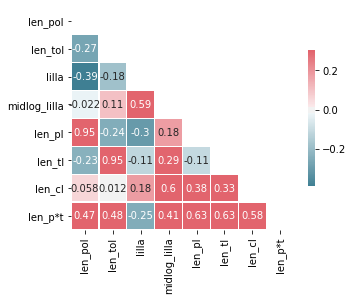

In [122]:
plot_corrmat(d[(align.prime == 'participant')], figsize=(5,5))

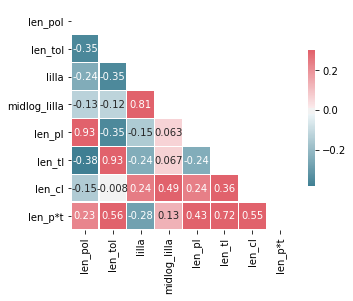

In [120]:
plot_corrmat(d[(align.prime == 'conversant') & (align.conv == 1)], figsize=(5,5))

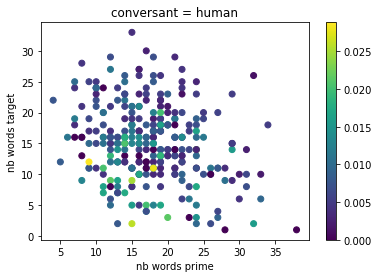

In [72]:
sc = plt.scatter(d[(align.prime == 'conversant') & (align.conv == 1)]['len_pl'], d[(align.prime == 'conversant') & (align.conv == 1)]['len_tl'], c=d[(align.prime == 'conversant') & (align.conv == 1)]['lilla'])
plt.colorbar(sc)
plt.xlabel('nb words prime')
plt.ylabel('nb words target')
plt.title('conversant = human')
plt.show()

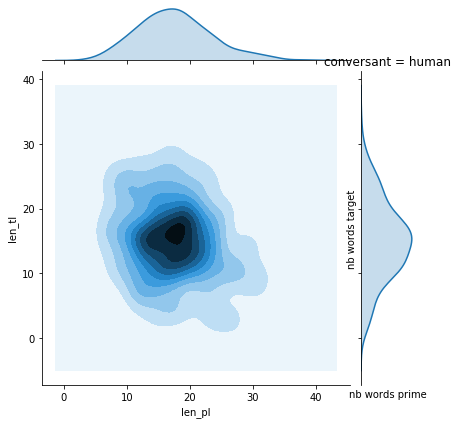

In [76]:
sns.jointplot(d[(align.prime == 'conversant') & (align.conv == 1)]['len_pl'], d[(align.prime == 'conversant') & (align.conv == 1)]['len_tl'], kind='kde')
plt.xlabel('nb words prime')
plt.ylabel('nb words target')
plt.title('conversant = human')
plt.show()

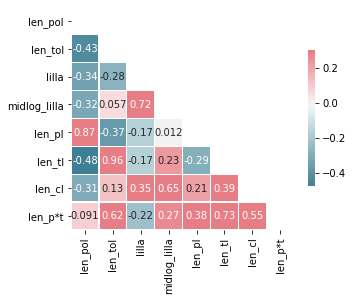

In [121]:
plot_corrmat(d[(align.prime == 'conversant') & (align.conv == 2)], figsize=(5,5))

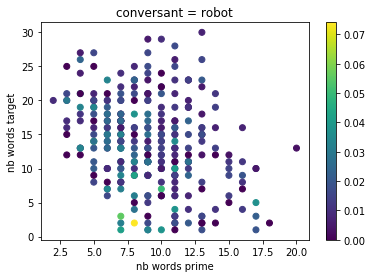

In [73]:
sc = plt.scatter(d[(align.prime == 'conversant') & (align.conv == 2)]['len_pl'], d[(align.prime == 'conversant') & (align.conv == 2)]['len_tl'], c=d[(align.prime == 'conversant') & (align.conv == 2)]['lilla'])
plt.colorbar(sc)
plt.xlabel('nb words prime')
plt.ylabel('nb words target')
plt.title('conversant = robot')
plt.show()

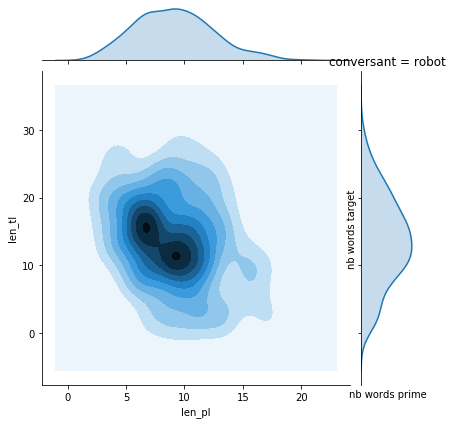

In [77]:
sns.jointplot(d[(align.prime == 'conversant') & (align.conv == 2)]['len_pl'], d[(align.prime == 'conversant') & (align.conv == 2)]['len_tl'], kind='kde')
plt.xlabel('nb words prime')
plt.ylabel('nb words target')
plt.title('conversant = robot')
plt.show()

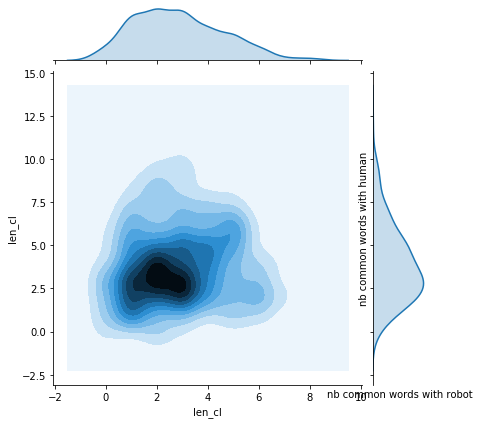

In [79]:
sns.jointplot(d[(align.prime == 'conversant') & (align.conv == 2)]['len_cl'], d[(align.prime == 'conversant') & (align.conv == 1)]['len_cl'], kind='kde')
plt.xlabel('nb common words with robot')
plt.ylabel('nb common words with human')
plt.show()

### Most common common words

In [85]:
words = [x.split(' ') for x in align[align.prime == 'conversant']['common_lemmas'] if str(x) != 'nan']
words = [y for x in words for y in x] # flatter

In [87]:
len(words), len(set(words)) # unique words vs nb words

(2008, 295)

In [106]:
words_df = nltk.FreqDist(words)

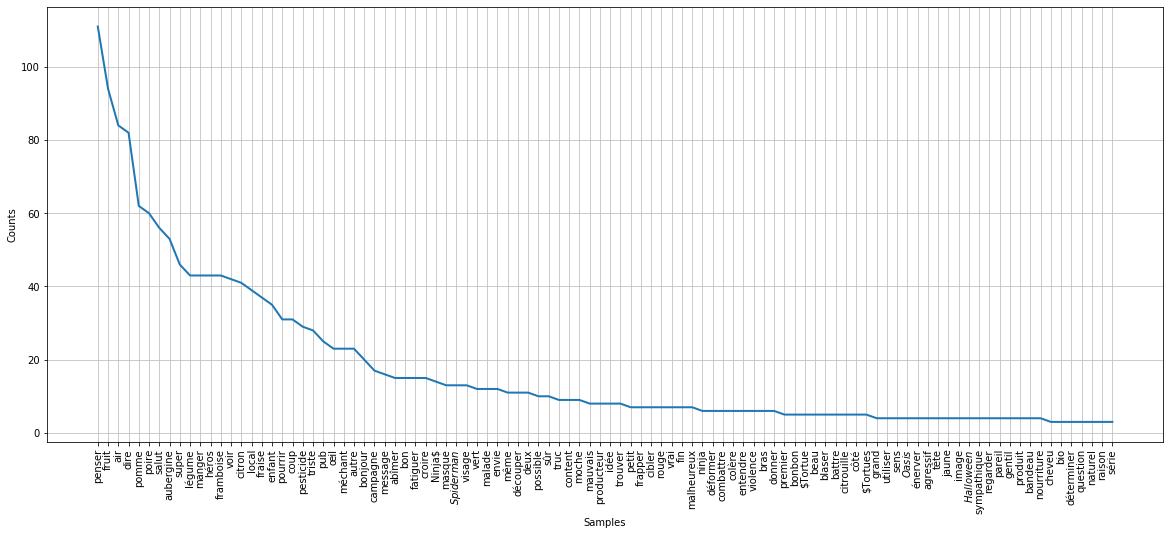

In [111]:
plt.figure(figsize=(20, 8))
words_df.plot(100)

Robot vs Human:

847 85


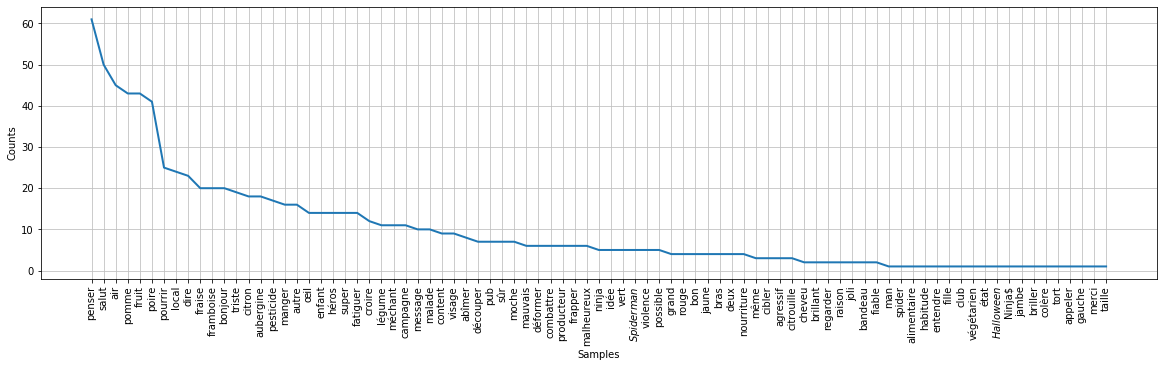

In [113]:
words_r = [x.split(' ') for x in align[(align.prime == 'conversant') & (align.conv == 2)]['common_lemmas'] if str(x) != 'nan']
words_r = [y for x in words_r for y in x] # flatter
print(len(words_r), len(set(words_r)))
words_r_df = nltk.FreqDist(words_r)
plt.figure(figsize=(20, 5))
words_r_df.plot(100)

1161 274


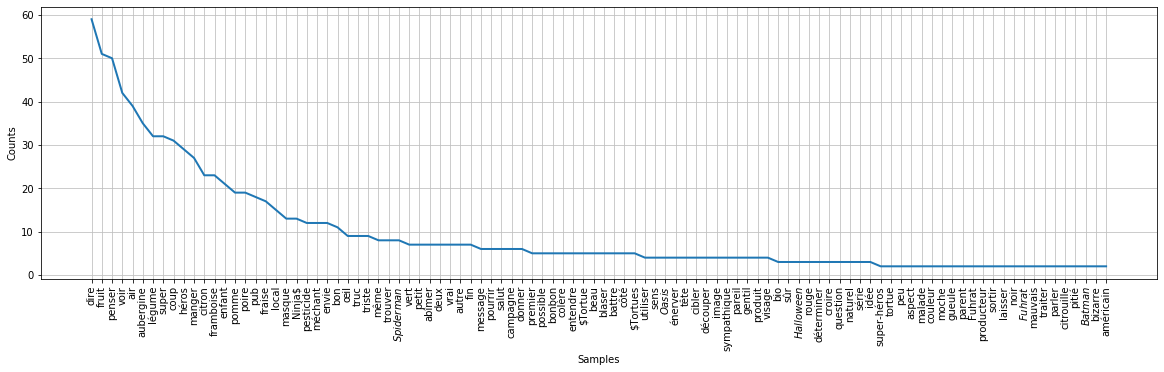

In [114]:
words_h = [x.split(' ') for x in align[(align.prime == 'conversant') & (align.conv == 1)]['common_lemmas'] if str(x) != 'nan']
words_h = [y for x in words_h for y in x] # flatter
print(len(words_h), len(set(words_h)))
words_h_df = nltk.FreqDist(words_h)
plt.figure(figsize=(20, 5))
words_h_df.plot(100)

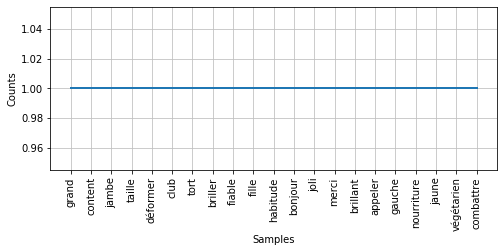

In [118]:
plt.figure(figsize=(8,2))
nltk.FreqDist(list(set(words_r) - set(words_h))).plot()